Loading energy data...

Transforming data to long format...

Transformed data (first 10 rows):
                            CONS_NO  FLAG       date  consumption
0  0000E78A22CB04533A0D9E1F2FBEEC5D     0 2014-01-01         1.34
1  0000E78A22CB04533A0D9E1F2FBEEC5D     0 2014-01-02         0.50
2  0000E78A22CB04533A0D9E1F2FBEEC5D     0 2014-01-03         3.85
3  0000E78A22CB04533A0D9E1F2FBEEC5D     0 2014-01-04         5.67
4  0000E78A22CB04533A0D9E1F2FBEEC5D     0 2014-01-05         6.38
5  0000E78A22CB04533A0D9E1F2FBEEC5D     0 2014-01-06         4.94
6  0000E78A22CB04533A0D9E1F2FBEEC5D     0 2014-01-07         5.33
7  0000E78A22CB04533A0D9E1F2FBEEC5D     0 2014-01-08         5.17
8  0000E78A22CB04533A0D9E1F2FBEEC5D     0 2014-01-09         5.79
9  0000E78A22CB04533A0D9E1F2FBEEC5D     0 2014-01-10         4.04

Basic statistics:
                FLAG                 date    consumption
count  672438.000000               672438  672313.000000
mean        0.082048  2014-01-13 12:00:00     

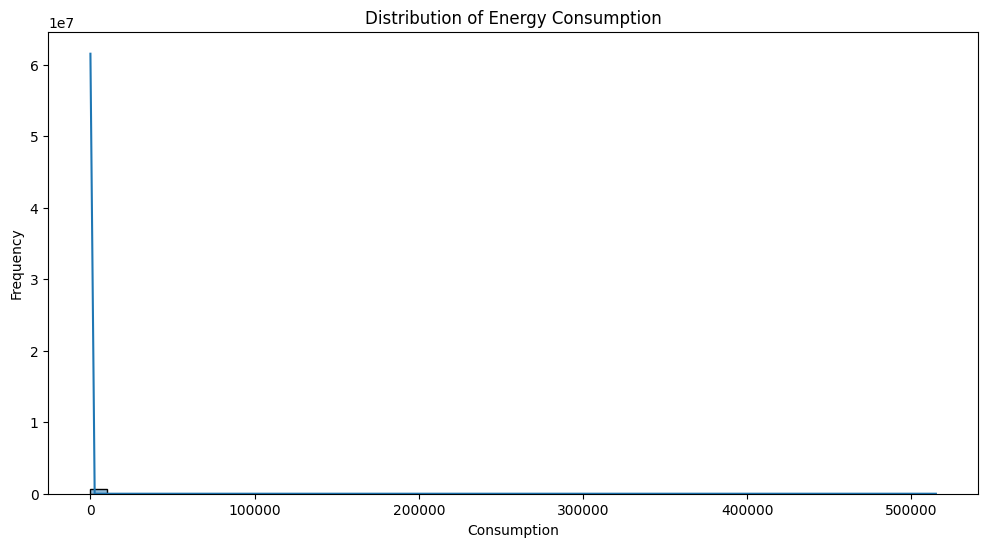

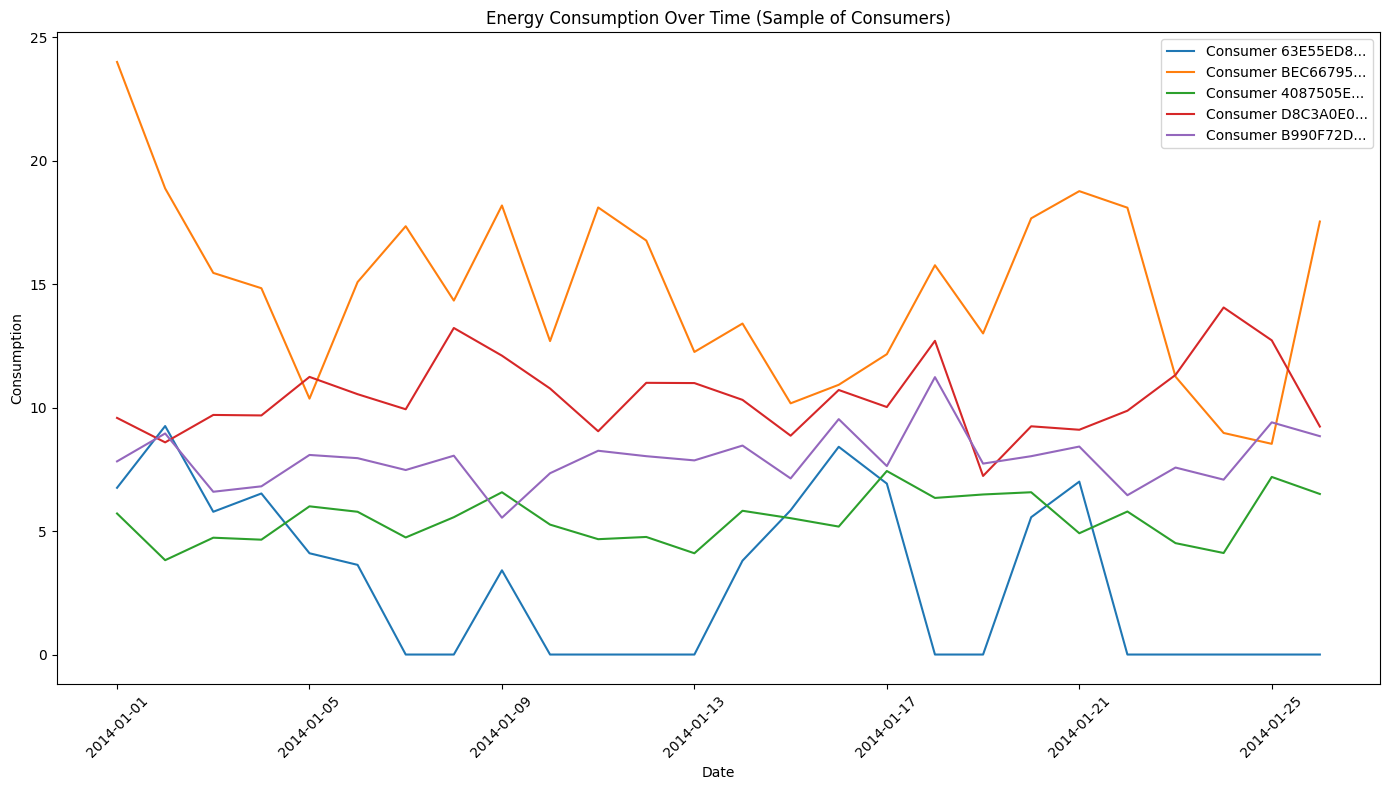

In [1]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set up paths
DATA_DIR = Path.cwd().parent / 'data'
energy_path = DATA_DIR / 'energyTdata.csv'

# Load the energy data
print("Loading energy data...")
energy_df = pd.read_csv(energy_path)

# The data is in wide format, let's convert it to long format
print("\nTransforming data to long format...")
energy_long = energy_df.melt(
    id_vars=['CONS_NO', 'FLAG'],  # These are the identifier columns
    var_name='date',              # This will be our new date column
    value_name='consumption'      # This will contain the consumption values
)

# Convert date strings to datetime
energy_long['date'] = pd.to_datetime(energy_long['date'])

# Sort by consumer number and date
energy_long = energy_long.sort_values(['CONS_NO', 'date']).reset_index(drop=True)

# Display the first few rows of the transformed data
print("\nTransformed data (first 10 rows):")
print(energy_long.head(10))

# Basic statistics
print("\nBasic statistics:")
print(energy_long.describe())

# Check for missing values
print("\nMissing values:")
print(energy_long.isnull().sum())

# Save the transformed data as CSV (more compatible)
output_path = DATA_DIR / 'energy_data_transformed.csv'
energy_long.to_csv(output_path, index=False)
print(f"\nTransformed data saved to: {output_path}")

# Basic visualization of consumption distribution
plt.figure(figsize=(12, 6))
sns.histplot(energy_long['consumption'].dropna(), bins=50, kde=True)
plt.title('Distribution of Energy Consumption')
plt.xlabel('Consumption')
plt.ylabel('Frequency')
plt.show()

# Time series plot for a sample of consumers
sample_consumers = energy_long['CONS_NO'].drop_duplicates().sample(min(5, len(energy_long['CONS_NO'].unique())))
sample_data = energy_long[energy_long['CONS_NO'].isin(sample_consumers)]

plt.figure(figsize=(14, 8))
for consumer in sample_consumers:
    consumer_data = sample_data[sample_data['CONS_NO'] == consumer]
    plt.plot(consumer_data['date'], consumer_data['consumption'], label=f'Consumer {consumer[:8]}...')

plt.title('Energy Consumption Over Time (Sample of Consumers)')
plt.xlabel('Date')
plt.ylabel('Consumption')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()